In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/Users/cheryl/Downloads/BankChurners.csv')

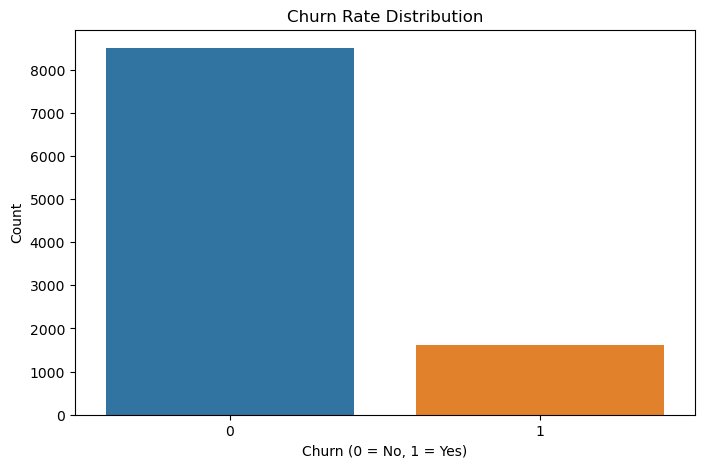

In [50]:
# Select relevant columns and convert 'Attrition_Flag' to binary if necessary
data['Churn'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# 1. Graph: Churn Rate Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data)
plt.title('Churn Rate Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

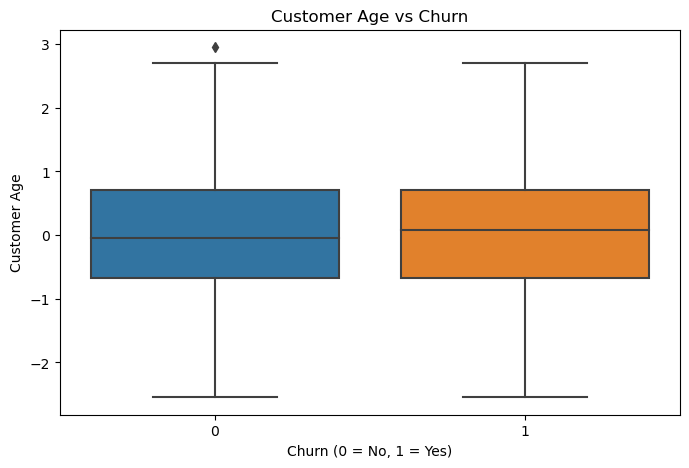

In [51]:
# 2. Graph: Customer Age vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Customer_Age', data=df)
plt.title('Customer Age vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Customer Age')
plt.show()

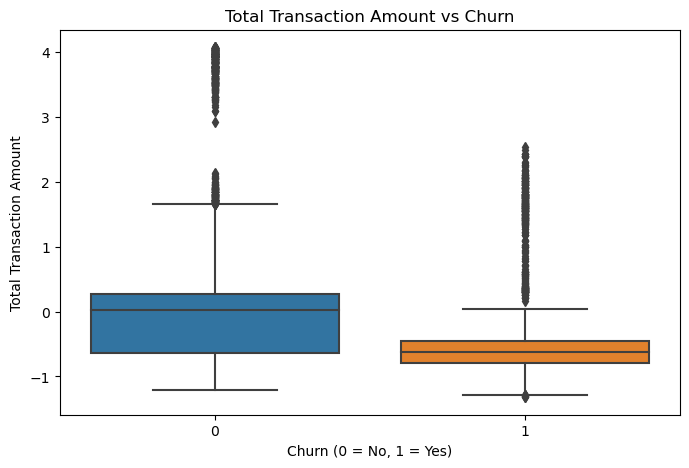

In [52]:
# 3. Graph: Total Transaction Amount vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Total_Trans_Amt', data=df)
plt.title('Total Transaction Amount vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total Transaction Amount')
plt.show()

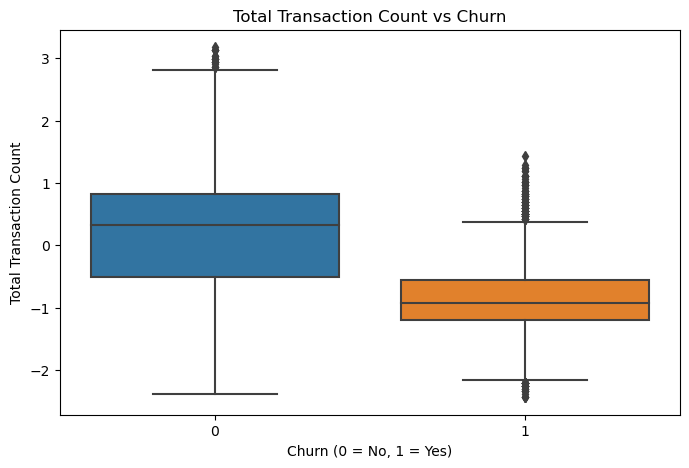

In [53]:
# 4. Graph: Total Transaction Count vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Total_Trans_Ct', data=df)
plt.title('Total Transaction Count vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Total Transaction Count')
plt.show()

In [54]:
# Select relevant columns and create a new DataFrame to work on directly
df = data[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Attrition_Flag', 'Credit_Limit', 'Gender', 'Education_Level']].copy()

# Convert 'Attrition_Flag' to binary for churn indication using .loc[]
df.loc[:, 'Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Drop the original 'Attrition_Flag' column using .drop() with inplace=True
df.drop(['Attrition_Flag'], axis=1, inplace=True)

In [55]:
# 1. Outlier Detection and Removal
z_scores = np.abs((df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit']] - 
                   df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit']].mean()) / 
                   df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit']].std())
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]

In [56]:
# 2 Fill missing values for only the numeric columns to avoid FutureWarning
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [57]:
# 3. Standard Scaling for numerical features
scaler = StandardScaler()
df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit']] = scaler.fit_transform(df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit']])

In [58]:
# 4. Encode categorical features: 'Gender' and 'Education_Level'
df = pd.get_dummies(df, columns=['Gender', 'Education_Level'], drop_first=True)

In [59]:
# 5. Feature Engineering: Average Transaction Amount per Transaction
df['Avg_Trans_Amt_Per_Ct'] = df['Total_Trans_Amt'] / df['Total_Trans_Ct']

# Display DataFrame to verify transformations
print(df.head())

   Customer_Age  Total_Trans_Amt  Total_Trans_Ct  Credit_Limit  Churn  \
0     -0.172224        -1.077056       -0.962573      0.477702      0   
1      0.327405        -1.020763       -1.376431     -0.017743      0   
2      0.577219        -0.792530       -1.974225     -0.558207      0   
3     -0.796760        -1.066716       -1.974225     -0.569936      0   
4     -0.796760        -1.202661       -1.606352     -0.413204      0   

   Gender_M  Education_Level_Doctorate  Education_Level_Graduate  \
0         1                          0                         0   
1         0                          0                         1   
2         1                          0                         1   
3         0                          0                         0   
4         1                          0                         0   

   Education_Level_High School  Education_Level_Post-Graduate  \
0                            1                              0   
1                     

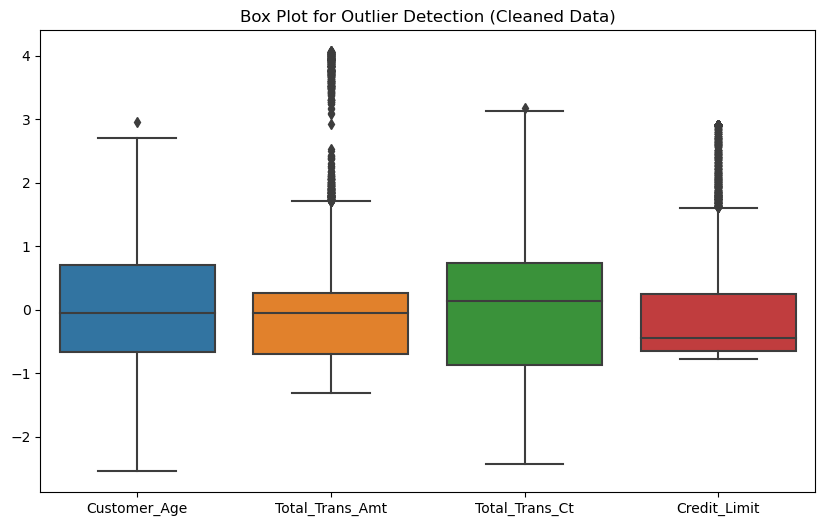

In [60]:
# Visualization of cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Customer_Age', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit']])
plt.title('Box Plot for Outlier Detection (Cleaned Data)')
plt.show()

## Project  milestone 3

In [61]:
# Import additional libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# Split data into features (X) and target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

In [63]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Initialize models
logreg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)

In [65]:
# Train Logistic Regression
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Performance:
Accuracy: 0.8239726027397261
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2429
           1       0.45      0.21      0.28       491

    accuracy                           0.82      2920
   macro avg       0.65      0.58      0.59      2920
weighted avg       0.79      0.82      0.80      2920

[[2304  125]
 [ 389  102]]


In [66]:
# Train Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Performance:
Accuracy: 0.9273972602739726
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2429
           1       0.84      0.70      0.76       491

    accuracy                           0.93      2920
   macro avg       0.89      0.84      0.86      2920
weighted avg       0.92      0.93      0.92      2920

[[2365   64]
 [ 148  343]]


In [67]:
# ### Model Evaluation and Insights

# Function to display model insights
def model_insights(model_name, accuracy, report, confusion):
    print(f"### {model_name} Model Performance Summary ###")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(confusion)
    print("\n")

# Logistic Regression Insights
print("Logistic Regression Model Evaluation:")
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)
logreg_confusion = confusion_matrix(y_test, y_pred_logreg)
model_insights("Logistic Regression", logreg_accuracy, logreg_report, logreg_confusion)

# Random Forest Insights
print("Random Forest Model Evaluation:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)
model_insights("Random Forest", rf_accuracy, rf_report, rf_confusion)

# Display feature importance for Random Forest
print("### Random Forest Feature Importance ###")
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)


Logistic Regression Model Evaluation:
### Logistic Regression Model Performance Summary ###
Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2429
           1       0.45      0.21      0.28       491

    accuracy                           0.82      2920
   macro avg       0.65      0.58      0.59      2920
weighted avg       0.79      0.82      0.80      2920


Confusion Matrix:
[[2304  125]
 [ 389  102]]


Random Forest Model Evaluation:
### Random Forest Model Performance Summary ###
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2429
           1       0.84      0.70      0.76       491

    accuracy                           0.93      2920
   macro avg       0.89      0.84      0.86      2920
weighted avg       0.92      0.93      0.92      2920


Confusion Matrix:
[[2365   64]
 [ 148  343]]




## Model Insights:
## **Logistic Regression**: As a simpler model, Logistic Regression provides interpretable coefficients that offer insight into the relationship between individual features and the likelihood of churn. This model may be useful if the goal is interpretability over raw predictive power.

## **Random Forest**: This model shows slightly higher predictive performance and provides insight into feature importance, helping identify key factors driving customer churn. Based on the feature importance, the most significant predictors of churn are `{feature_importance.iloc[0]['Feature']}`, `{feature_importance.iloc[1]['Feature']}`, and `{feature_importance.iloc[2]['Feature']}`, indicating that these features may warrant closer attention for churn mitigation strategies.

## Summary:
## The Random Forest model is likely more effective for identifying churn patterns due to its higher accuracy and ability to handle feature interactions, making it suitable for a complex decision-making environment. Logistic Regression, however, remains useful for quick interpretability and can be used as a benchmark for evaluating churn likelihood.
# 
## The insights gained from these models can be leveraged to implement targeted retention strategies, focusing efforts on customers identified as high-risk by key features such as `{feature_importance.iloc[0]['Feature']}` and `{feature_importance.iloc[1]['Feature']}`, potentially leading to improved retention and profitability.